# Machine Learning Model Validation

June 21-23, 2023

This demo (based on TaiwanCredit data, a classification task) covers:

- ReLU deep feedforward neural networks (ReLU-DNN) and its interpretation by local linear models.

- A case study based on the CoCircles dataset.

## Install PiML Toolbox

- Run `!pip install piml` to install the latest version of PiML.
- In Google Colab, we need restart the runtime in order to use newly installed version.

In [1]:
!pip install piml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.4 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=83d51b1116cbd38b7d24bf111408555f62d5566038e86d7104b7baabbe2717e3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a2

## Load and Prepare Data

Initilaize a new experiment by `piml.Experiment()`

In [2]:
from piml import Experiment
exp = Experiment()

Choose CoCircles

In [3]:
exp.data_loader()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [4]:
exp.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

Prepare dataset with default settings

In [5]:
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## Train Intepretable Models

- Train a ReLU-DNN with default settings.
- Train another ReLU-DNN, and customize it with

    - **Model name**: Sparse-ReLU-DNN
    - **L1_regularization**: 0.00065
    - **Early_stop_epochs**: 100
    - **Batch_size**: 200

- Register ReLU-DNN and Sparse-ReLU-DNN.

In [6]:
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## Global Model Interpretation

Choose ReLU-DNN, see the details [here](https://selfexplainml.github.io/PiML-Toolbox/_build/html/guides/models/reludnn.html).

- Switch to the "Global-Interpretability" tab.

- Try the following options to view the different aspects of the model:

    - **Feature**: the univeriate feature for the local linear profile plot.

    - **Feature 1/2**: the bivariate features for the pairwise local liner model plot.

    - **Shown in original scale**: check box can be enabled to display the features in their original scale, instead of the Minmax scaled between 0 to 1.

- The displayed results include:

    - **Feature Importance**: displays the top-10 features' importance.

    - **Parallel Corrodinate Plot**: visualizes coefficients of different local linear models (LLMs), where each line represents a single LLM.

    - **Local Linear Profiles**:

        - 1D: displays the marginal linear functions upon centering.

        - 2D: reveals how the LLM coefficient of one feature would change as another feature value changes.

In [7]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

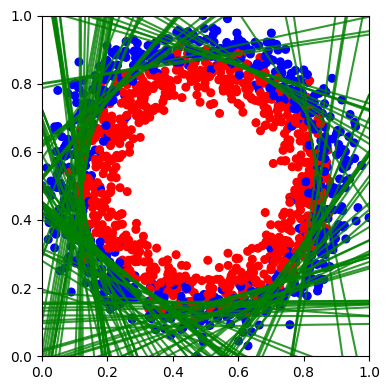

In [8]:
x, y, _ = exp.get_data(train=True)
unp = exp.get_model("ReLU-DNN").estimator.model_unwrapper(x, y)
fig = unp.visualize2D_lines(figsize=(4, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

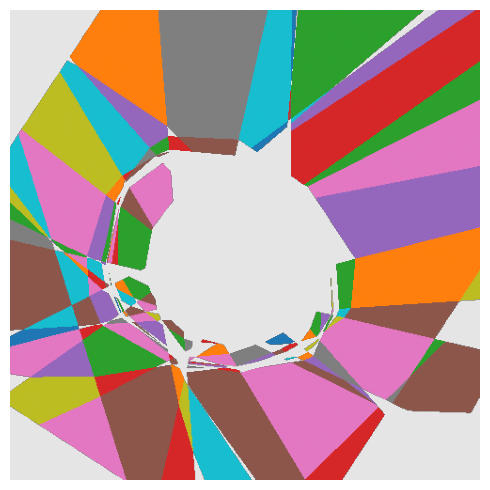

In [9]:
fig = unp.visualize2D_regions(meshsize=500, figsize=(5, 5))

Choose Sparse-ReLU-DNN.

In [10]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

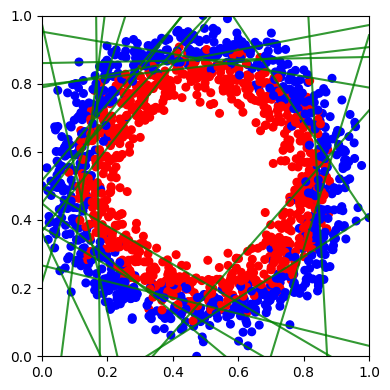

In [11]:
x, y, _ = exp.get_data(train=True)
unp = exp.get_model("Sparse-ReLU-DNN").estimator.model_unwrapper(x, y)
fig = unp.visualize2D_lines(figsize=(4, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

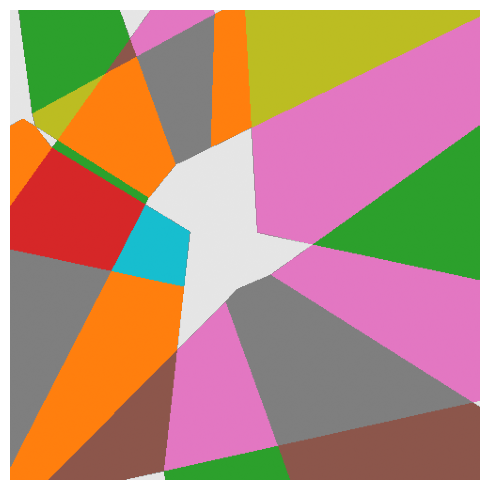

In [12]:
fig = unp.visualize2D_regions(meshsize=500, figsize=(5, 5))

## Local Model Interpretation

Choose ReLU-DNN or Sparse-ReLU-DNN.

- Switch to the "Local-Interpretability" tab.

- Try the following options to view the different aspects of the model:

    - **Sample Index**: choose the sample index (in the training set) to be interpreted.

    - **Centered**: whether to display the results by subtracting the mean for each feature.

    - **Shown in original scale**: enable the check box to display the features in their original scale, instead of the Minmax scaled between 0 to 1.

- The displayed results include:

    - **Local Exact Interpretability**: displays the top-10 features' contribution of the sample to be interpreted, see the details [here](https://selfexplainml.github.io/PiML-Toolbox/_build/html/guides/models/reludnn.html#local-interpretation).

In [13]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## LLM Summary Table

Choose ReLU-DNN or Sparse-ReLU-DNN.

- Switch to the "LLM-Summary" tab.

- The displayed results include:

    - **LLM Summary Table**: displays the summary statistics for each LLM, see details [here](https://selfexplainml.github.io/PiML-Toolbox/_build/html/guides/models/reludnn.html#llm-summary-table).

    - **Violin Plot of LLM Coefficients**: shows the LLM coefficient distribution per feature weighted by the sample size of each LLM, see details [here](https://selfexplainml.github.io/PiML-Toolbox/_build/html/guides/models/reludnn.html#llm-summary-table).

In [14]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>